# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [163]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [164]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    A=x**2*(numpy.sin(x))
    return (A);

Ensure your function works with numpy arrays:

In [165]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [166]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    B=-(x**2)*(numpy.cos(x))+2*(x*(numpy.sin(x))+(numpy.cos(x)))-2
    return (B);

Check your solution with the same numpy array:

In [167]:
assert g(0) == 0.

In [168]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [205]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE    
    C=g(xmax)-g(xmin)
    return C;


Check your analytic function:

In [206]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [179]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    dx=(xmax-xmin)/N
    S = 0
    for i in range (0,N):
        X=xmin+i*dx
        S=(dx/6)*(f(X)+4*f(X+0.5*dx)+f(X+dx))+S
    return S

Make sure you have implemented Simpson's rule correctly:

In [180]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [183]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Fractional error between numerical calculated result and analytically derived result')

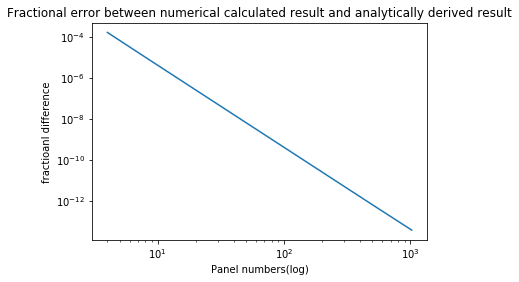

In [224]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1) # Define reference value from analytical solution

import numpy as np
n=result_analytic
xvalues = (panel_counts)
yvalues = [np.abs(integrate_numeric(x0, x1, 4)-n)/n,
           np.abs(integrate_numeric(x0, x1, 8)-n)/n,
           np.abs(integrate_numeric(x0, x1, 16)-n)/n,
           np.abs(integrate_numeric(x0, x1, 32)-n)/n,
           np.abs(integrate_numeric(x0, x1, 64)-n)/n,
           np.abs(integrate_numeric(x0, x1, 128)-n)/n,
           np.abs(integrate_numeric(x0, x1, 256)-n)/n,
           np.abs(integrate_numeric(x0, x1, 512)-n)/n,
           np.abs(integrate_numeric(x0, x1, 1024)-n)/n,]


plt.loglog(xvalues, yvalues,)
plt.xlabel("Panel numbers(log)")
plt.ylabel("fractioanl difference")
plt.title("Fractional error between numerical calculated result and analytically derived result")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

before the panel number reaches 4000, the accuracy steadily improved with the increase of panel numbe. If the number of panels is taken to large, the accuracy stop improving but decrease due to the numerical round-off issues.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The accuracy won't increase as quickly as the Simpson's rule, but the accuracy steadily improve until the panel number reaches 1000,000